In [1]:
#in the name of GOD

In [2]:
import pandas as pd 
import numpy as np
from IPython.display import clear_output
import time
import pickle

import matplotlib.pyplot as plt
from matplotlib.cbook import flatten
import matplotlib.cm as cm
import matplotlib as matplotlib

from fastdtw import fastdtw

def color_map_color(value, cmap_name='coolwarm', vmin=0, vmax=10):
    # norm = plt.Normalize(vmin, vmax)
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  # PiYG
    rgb = cmap(norm(abs(value)))[:3]  # will return rgba, we take only first 3 so we get rgb
    color = matplotlib.colors.rgb2hex(rgb)
    return color
cl=['r','g','b','c','m','y','k']
color=dict()
for i,el in enumerate(cl):
    color.update({i:el})
#extract the labels for clutering precision its for after clustering
def time_convertor(x):
    s,h,m=0,0,0
    s=round(x%60,2)
    m=int(x/60)
    h=int(m/60)
    m=m%60
    time=str(h)+':'+str(m)+':'+str(s)
    return pd.to_datetime('1970-01-01 '+time)


# Display figures inline in Jupyter notebook
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 5)})

In [3]:
#prepare Dataset gyroscope
dfg=pd.read_csv('16\giroscopio_terra.csv')
dfg['ts']=pd.to_datetime(dfg.apply(lambda x:(round((x.uptimeNanos-dfg.uptimeNanos[0])/1000000)*1000000),axis=1))
dm=dfg['ts']
dfg=dfg.drop('uptimeNanos',1).drop('timestamp',1)
dfg=dfg.set_index('ts').rename(columns={'x': 'g-x','y': 'g-y','z': 'g-z'})
#prepare Dataset accelarator
dfa=pd.read_csv('16\\acelerometro_terra.csv')
dfa['ts']=dm
dfa=dfa.drop('uptimeNanos',1).drop('timestamp',1)
dfa=dfa.set_index('ts').rename(columns={'x': 'a-x','y': 'a-y','z': 'a-z'})
df1 = pd.concat([dfa, dfg], axis=1, join='outer')

In [4]:
#prepare Dataset gyroscope
dfg=pd.read_csv('17\giroscopio_terra.csv')
dfg['ts']=pd.to_datetime(dfg.apply(lambda x:(round((x.uptimeNanos-dfg.uptimeNanos[0])/1000000)*1000000),axis=1))
dm=dfg['ts']
dfg=dfg.drop('uptimeNanos',1).drop('timestamp',1)
dfg=dfg.set_index('ts').rename(columns={'x': 'g-x','y': 'g-y','z': 'g-z'})
#prepare Dataset accelarator
dfa=pd.read_csv('17\\acelerometro_terra.csv')
dfa['ts']=dm
dfa=dfa.drop('uptimeNanos',1).drop('timestamp',1)
dfa=dfa.set_index('ts').rename(columns={'x': 'a-x','y': 'a-y','z': 'a-z'})
df2 = pd.concat([dfa, dfg], axis=1, join='outer')

In [5]:
#prepare Dataset gyroscope
dfg=pd.read_csv('20\\giroscopio_terra.csv')
dfg['ts']=pd.to_datetime(dfg.apply(lambda x:(round((x.uptimeNanos-dfg.uptimeNanos[0])/1000000)*1000000),axis=1))
dm=dfg['ts']
dfg=dfg.drop('uptimeNanos',1).drop('timestamp',1)
dfg=dfg.set_index('ts').rename(columns={'x': 'g-x','y': 'g-y','z': 'g-z'})
#prepare Dataset accelarator
dfa=pd.read_csv('20\\acelerometro_terra.csv')
dfa['ts']=dm
dfa=dfa.drop('uptimeNanos',1).drop('timestamp',1)
dfa=dfa.set_index('ts').rename(columns={'x': 'a-x','y': 'a-y','z': 'a-z'})
df3 = pd.concat([dfa, dfg], axis=1, join='outer')

In [6]:
#prepare Dataset gyroscope
dfg=pd.read_csv('21\giroscopio_terra.csv')
dfg['ts']=pd.to_datetime(dfg.apply(lambda x:(round((x.uptimeNanos-dfg.uptimeNanos[0])/1000000)*1000000),axis=1))
dm=dfg['ts']
dfg=dfg.drop('uptimeNanos',1).drop('timestamp',1)
dfg=dfg.set_index('ts').rename(columns={'x': 'g-x','y': 'g-y','z': 'g-z'})
#prepare Dataset accelarator
dfa=pd.read_csv('21\\acelerometro_terra.csv')
dfa['ts']=dm
dfa=dfa.drop('uptimeNanos',1).drop('timestamp',1)
dfa=dfa.set_index('ts').rename(columns={'x': 'a-x','y': 'a-y','z': 'a-z'})
df4 = pd.concat([dfa, dfg], axis=1, join='outer')

In [7]:
#prepare Labeled dataset on 16
dfl=pd.read_csv('16\\groundTruth.csv')
dfl['length']=dfl.en-dfl.st
lmean=dfl.length.mean()
lstd=dfl.length.std()

dfl['st_time']=dfl.apply(lambda x:time_convertor(x.st) ,axis=1 )
dfl['en_time']=dfl.apply(lambda x:time_convertor(x.en) ,axis=1 )
dfl=dfl.drop('st',1).drop('en',1).drop('length',1)
evented_label_1=list()
for i in range(len(dfl)):
    evented_label_1.append((dfl.iloc[i][0],dfl.iloc[i][1],dfl.iloc[i][2]))

In [8]:
#prepare Labeled dataset on 17
dfl=pd.read_csv('17\\groundTruth.csv')
dfl['length']=dfl.en-dfl.st
lmean=dfl.length.mean()
lstd=dfl.length.std()

dfl['st_time']=dfl.apply(lambda x:time_convertor(x.st) ,axis=1 )
dfl['en_time']=dfl.apply(lambda x:time_convertor(x.en) ,axis=1 )
dfl=dfl.drop('st',1).drop('en',1).drop('length',1)
evented_label_2=list()
for i in range(len(dfl)):
    evented_label_2.append((dfl.iloc[i][0],dfl.iloc[i][1],dfl.iloc[i][2]))

In [9]:
#prepare Labeled dataset on 20
dfl=pd.read_csv('20\\groundTruth.csv')
dfl['length']=dfl.en-dfl.st
lmean=dfl.length.mean()
lstd=dfl.length.std()

dfl['st_time']=dfl.apply(lambda x:time_convertor(x.st) ,axis=1 )
dfl['en_time']=dfl.apply(lambda x:time_convertor(x.en) ,axis=1 )
dfl=dfl.drop('st',1).drop('en',1).drop('length',1)
evented_label_3=list()
for i in range(len(dfl)):
    evented_label_3.append((dfl.iloc[i][0],dfl.iloc[i][1],dfl.iloc[i][2]))

In [10]:
#prepare Labeled dataset on 21
dfl=pd.read_csv('17\\groundTruth.csv')
dfl['length']=dfl.en-dfl.st
lmean=dfl.length.mean()
lstd=dfl.length.std()

dfl['st_time']=dfl.apply(lambda x:time_convertor(x.st) ,axis=1 )
dfl['en_time']=dfl.apply(lambda x:time_convertor(x.en) ,axis=1 )
dfl=dfl.drop('st',1).drop('en',1).drop('length',1)
evented_label_4=list()
for i in range(len(dfl)):
    evented_label_4.append((dfl.iloc[i][0],dfl.iloc[i][1],dfl.iloc[i][2]))

In [11]:
with open("temp_event_on16.txt", "rb") as fp:
    te = pickle.load(fp)
with open("distance_on16.txt", "rb") as fp:
    dc = pickle.load(fp)

In [59]:
#Dont RUN this part
#clustering precision
def eveluate_ground_distance_from_temp_eventt(df,evented_label,temp_event,Name):
    n=0
    k=len(temp_event)*len(evented_label)
    labels_distance=list()

    for tag,st,en in evented_label:
        dummy=list()
        for t_e in temp_event:
            clear_output(wait=True)
            n=n+1
            print('disstance calculatoin ',round((n/k)*100,2),' %   is complete on ',Name )
            dist,_=fastdtw(df[st:en],t_e)
            dummy.append(dist)
        labels_distance.append((tag,dummy))
    return labels_distance

t1=time.time()
ld1=eveluate_ground_distance_from_temp_eventt(df1,evented_label_1,te,'1')
with open("ld1_on16.txt", "wb") as fp:
    pickle.dump(ld1, fp)

ld2=eveluate_ground_distance_from_temp_eventt(df2,evented_label_2,te,'2')
with open("ld2_on16.txt", "wb") as fp:
    pickle.dump(ld1, fp)

ld3=eveluate_ground_distance_from_temp_eventt(df3,evented_label_3,te,'3')
with open("ld3_on16.txt", "wb") as fp:
    pickle.dump(ld3, fp)
    
ld4=eveluate_ground_distance_from_temp_eventt(df4,evented_label_4,te,'4')
with open("ld4_on16.txt", "wb") as fp:
    pickle.dump(ld4, fp)
t2=time.time()
print(round((t2-t1)/60) ,'min has time for calculaton distant')

disstance calculatoin  100.0  %   is complete on  4
71 min has time for calculaton distant


In [12]:
with open("ld1_on16.txt", "rb") as fp:
    ld1 = pickle.load(fp)
with open("ld2_on16.txt", "rb") as fp:
    ld2 = pickle.load(fp)
with open("ld3_on16.txt", "rb") as fp:
    ld3 = pickle.load(fp)
with open("ld4_on16.txt", "rb") as fp:
    ld4 = pickle.load(fp)
ld=ld1+ld2+ld3+ld4

In [13]:
from sklearn.cluster import AgglomerativeClustering
from copy import deepcopy

#plot and optimize the number of the cluster and the linkage method
def creat_Symmetric_matrix(file):  
    MTX=deepcopy(file)
    for i in range(len(MTX)):
        while len(MTX[i])!=len(MTX):
            MTX[i].append(0)
    #make it Symmetry from diameter
    arr=np.array(MTX)
    dis=np.array(MTX)
    for i in range(len(arr)):
        for j in range(len(arr)):
            if (i>j):
                dis[j][i]=arr[i][j]
    return dis

def Mean(dprecision):
    return np.mean(list(dict(dprecision).values()))

def Oploter(number_of_cluster , linkage_method):
    #calculate the precision of clustering by labeled data 
    exploratory_analysis=list()
    for i,el in enumerate(ld):
        midle_list=list()
        label_tag =el[0]
        label_distance=el[1].copy()
        label_distance.append(0)
        distance_matrix=deepcopy(dc)
        distance_matrix.append(label_distance)
        DMX=creat_Symmetric_matrix(distance_matrix)
        Labels = AgglomerativeClustering(n_clusters=number_of_cluster, affinity='precomputed', linkage = linkage_method).fit(DMX).labels_

        #extract lable  and labele it from the item we put at the end
        for i , x in enumerate(Labels):
            if i!=(len(Labels)-1):
                if x==Labels[-1]:
                    midle_list.append(i)
        exploratory_analysis.append([label_tag,midle_list])
    
    actg=dict()
    for ev,x in exploratory_analysis:
        if ev in actg:
            actg[ev].append(x)
        else:
            actg.update({ev:[x]})
    #calculate the Probibility of being event of temp_event
    Prob_threshold=0.1
    precision=list()
    for event_name in actg:
        flat_list=list(dict.fromkeys(flatten(actg[event_name])))
        dprecision=list()
        for S in flat_list:
            x=0
            Number=len(actg[event_name])
            for i in range(Number):
                if S in actg[event_name][i]:
                    x=x+1
            Probability=x/Number
            if Probability > Prob_threshold:
                dprecision.append((S,Probability))
        precision.append((event_name,len(dprecision),Mean(dprecision),dprecision))
    return precision


In [118]:
#linkage method average
linkage_mth='average'
Ya=list()
t1=time.time()
X=range(5,1100,50)
for num_cl in X:
    X=Oploter(num_cl,linkage_mth)
    Ya.append(X)
t2=time.time()
print(round((t2-t1)/60) ,'min has time for calculaton distant')

99 min has time for calculaton distant


No handles with labels found to put in legend.


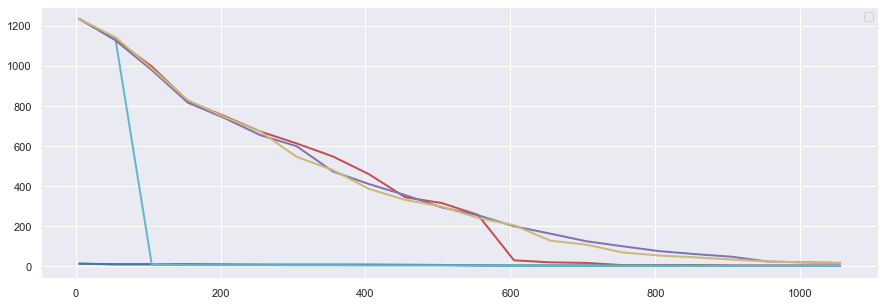

In [119]:
Y_num=dict()
for i in range(0,6):
    Y_num.update({i:[x[i][1] for x in Ya]})
fig, ax = plt.subplots()
X=range(5,1100,50)
for i in range(0,6):
    ax.plot(X,Y_num[i], linestyle='-', linewidth=2,c=color[i])
ax.legend();
plt.show() 

No handles with labels found to put in legend.


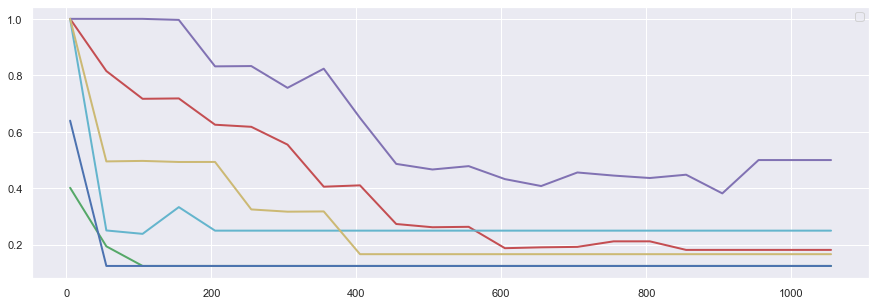

In [120]:
Y_Q=dict()
for i in range(0,6):
    Y_Q.update({i:[x[i][2] for x in Ya]})
fig, ax = plt.subplots()
X=range(5,1100,50)
for i in range(0,6):
    ax.plot(X,Y_Q[i], linestyle='-', linewidth=2,c=color[i])
ax.legend();
plt.show() 

No handles with labels found to put in legend.


40 min has time for calculaton distant


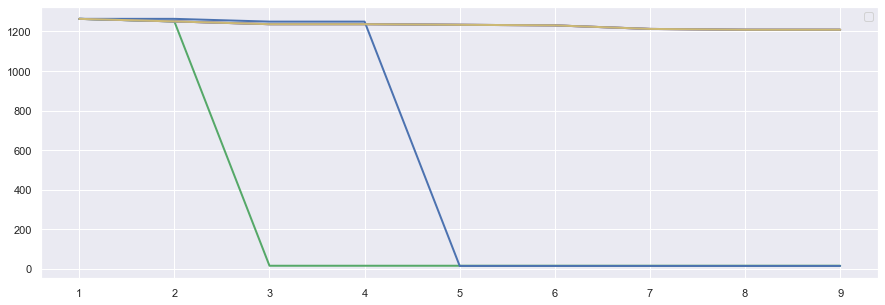

No handles with labels found to put in legend.


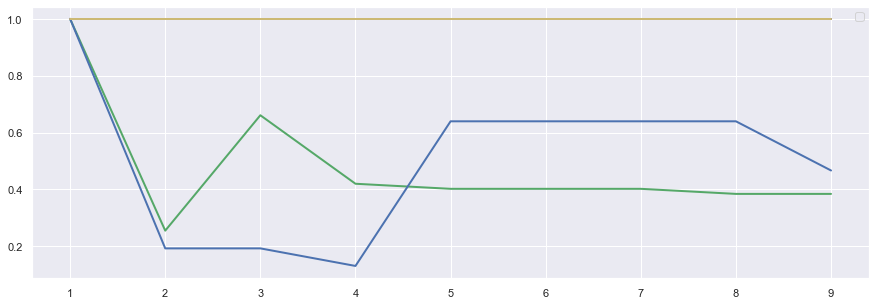

In [26]:
#linkage method average
linkage_mth='average'
Ya=list()
t1=time.time()
X=range(1,10)
for num_cl in X:
    X=Oploter(num_cl,linkage_mth)
    Ya.append(X)
t2=time.time()
print(round((t2-t1)/60) ,'min has time for calculaton distant')
Y_num=dict()
for i in range(0,6):
    Y_num.update({i:[x[i][1] for x in Ya]})
fig, ax = plt.subplots()
X=range(1,10)
for i in range(0,6):
    ax.plot(X,Y_num[i], linestyle='-', linewidth=2,c=color[i])
ax.legend();
plt.show()
Y_Q=dict()
for i in range(0,6):
    Y_Q.update({i:[x[i][2] for x in Ya]})
fig, ax = plt.subplots()
X=range(1,10)
for i in range(0,6):
    ax.plot(X,Y_Q[i], linestyle='-', linewidth=2,c=color[i])
ax.legend();
plt.show() 

No handles with labels found to put in legend.


223 min has time for calculaton distant


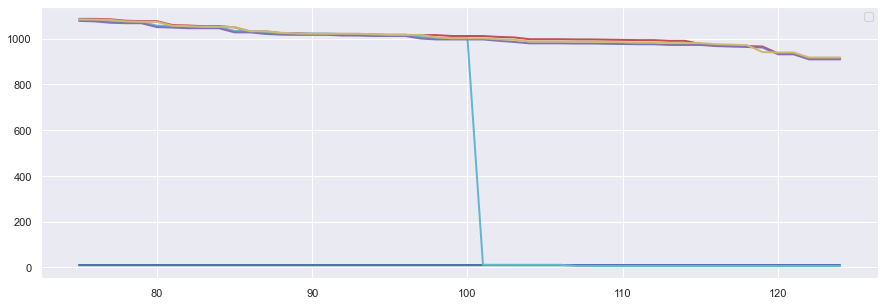

No handles with labels found to put in legend.


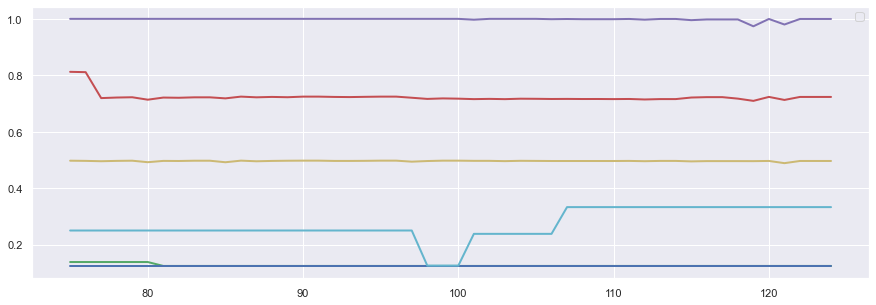

In [30]:
#linkage method average
linkage_mth='average'
Ya=list()
t1=time.time()
X=range(75,125)
for num_cl in X:
    X=Oploter(num_cl,linkage_mth)
    Ya.append(X)
t2=time.time()
print(round((t2-t1)/60) ,'min has time for calculaton distant')
Y_num=dict()
for i in range(0,6):
    Y_num.update({i:[x[i][1] for x in Ya]})
fig, ax = plt.subplots()
X=range(75,125)
for i in range(0,6):
    ax.plot(X,Y_num[i], linestyle='-', linewidth=2,c=color[i])
ax.legend();
plt.show() 
Y_Q=dict()
for i in range(0,6):
    Y_Q.update({i:[x[i][2] for x in Ya]})
fig, ax = plt.subplots()
X=range(75,125)
for i in range(0,6):
    ax.plot(X,Y_Q[i], linestyle='-', linewidth=2,c=color[i])
ax.legend();
plt.show() 

No handles with labels found to put in legend.


359 min has time for calculaton distant


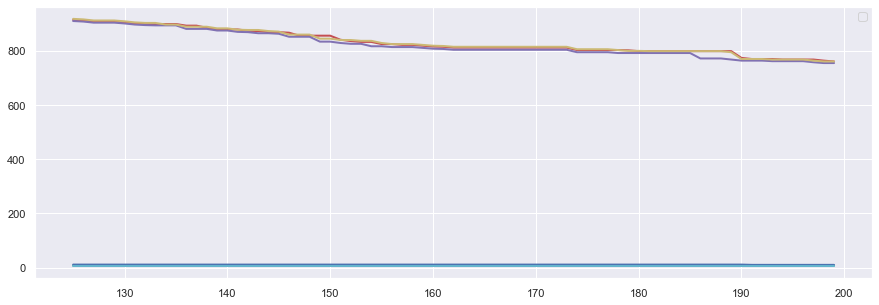

No handles with labels found to put in legend.


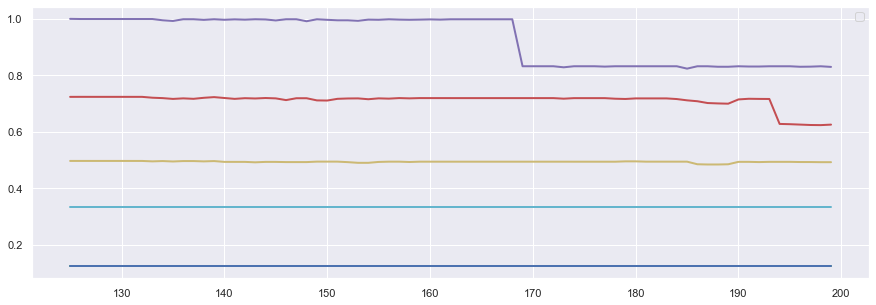

In [27]:
#linkage method average
linkage_mth='average'
Ya=list()
t1=time.time()
X=range(125,200)
for num_cl in X:
    X=Oploter(num_cl,linkage_mth)
    Ya.append(X)
t2=time.time()
print(round((t2-t1)/60) ,'min has time for calculaton distant')
Y_num=dict()
for i in range(0,6):
    Y_num.update({i:[x[i][1] for x in Ya]})
fig, ax = plt.subplots()
X=range(125,200)
for i in range(0,6):
    ax.plot(X,Y_num[i], linestyle='-', linewidth=2,c=color[i])
ax.legend();
plt.show() 
Y_Q=dict()
for i in range(0,6):
    Y_Q.update({i:[x[i][2] for x in Ya]})
fig, ax = plt.subplots()
X=range(125,200)
for i in range(0,6):
    ax.plot(X,Y_Q[i], linestyle='-', linewidth=2,c=color[i])
ax.legend();
plt.show() 

No handles with labels found to put in legend.


456 min has time for calculaton distant


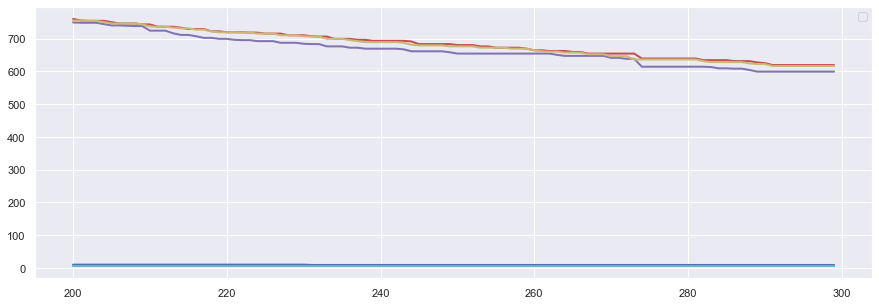

No handles with labels found to put in legend.


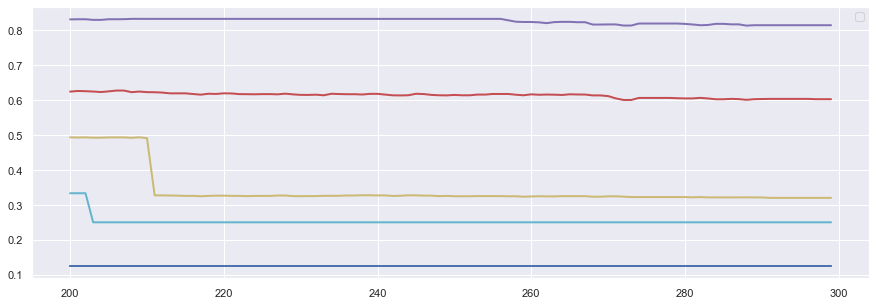

In [28]:
#linkage method average
linkage_mth='average'
Ya=list()
t1=time.time()
X=range(200,300)
for num_cl in X:
    X=Oploter(num_cl,linkage_mth)
    Ya.append(X)
t2=time.time()
print(round((t2-t1)/60) ,'min has time for calculaton distant')
Y_num=dict()
for i in range(0,6):
    Y_num.update({i:[x[i][1] for x in Ya]})
fig, ax = plt.subplots()
X=range(200,300)
for i in range(0,6):
    ax.plot(X,Y_num[i], linestyle='-', linewidth=2,c=color[i])
ax.legend();
plt.show() 
Y_Q=dict()
for i in range(0,6):
    Y_Q.update({i:[x[i][2] for x in Ya]})
fig, ax = plt.subplots()
X=range(200,300)
for i in range(0,6):
    ax.plot(X,Y_Q[i], linestyle='-', linewidth=2,c=color[i])
ax.legend();
plt.show() 

No handles with labels found to put in legend.


407 min has time for calculaton distant


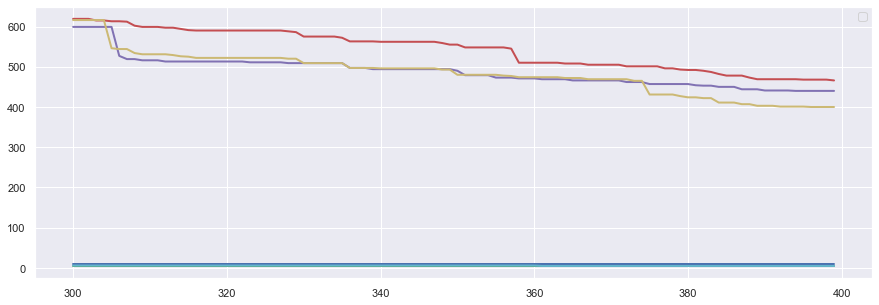

No handles with labels found to put in legend.


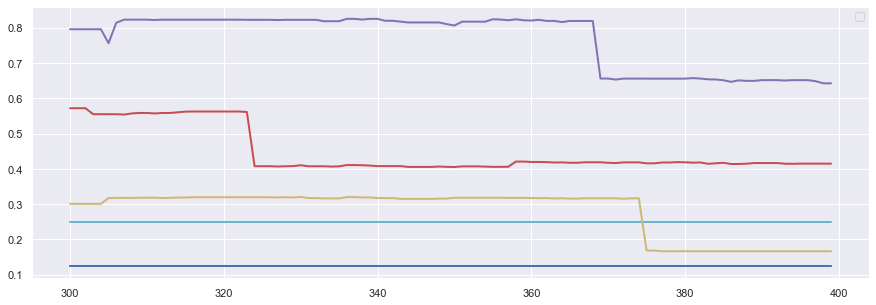

In [32]:
#linkage method average
linkage_mth='average'
Ya=list()
t1=time.time()
X=range(300,400)
for num_cl in X:
    X=Oploter(num_cl,linkage_mth)
    Ya.append(X)
t2=time.time()
print(round((t2-t1)/60) ,'min has time for calculaton distant')
Y_num=dict()
for i in range(0,6):
    Y_num.update({i:[x[i][1] for x in Ya]})
fig, ax = plt.subplots()
X=range(300,400)
for i in range(0,6):
    ax.plot(X,Y_num[i], linestyle='-', linewidth=2,c=color[i])
ax.legend();
plt.show() 
Y_Q=dict()
for i in range(0,6):
    Y_Q.update({i:[x[i][2] for x in Ya]})
fig, ax = plt.subplots()
X=range(300,400)
for i in range(0,6):
    ax.plot(X,Y_Q[i], linestyle='-', linewidth=2,c=color[i])
ax.legend();
plt.show() 

No handles with labels found to put in legend.


443 min has time for calculaton distant


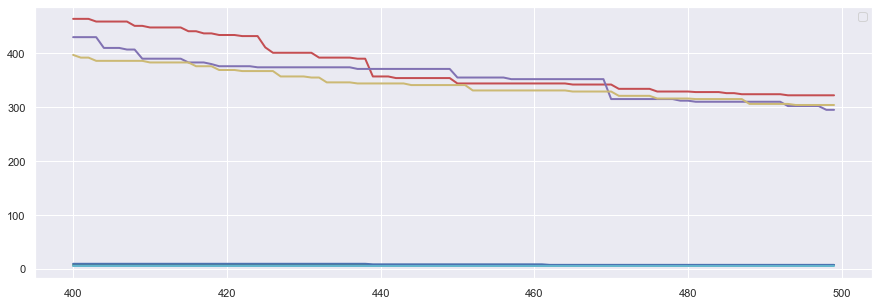

No handles with labels found to put in legend.


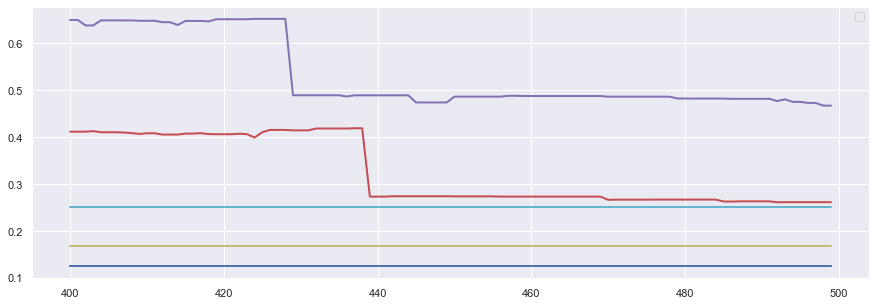

In [33]:
#linkage method average
linkage_mth='average'
Ya=list()
t1=time.time()
X=range(400,500)
for num_cl in X:
    X=Oploter(num_cl,linkage_mth)
    Ya.append(X)
t2=time.time()
print(round((t2-t1)/60) ,'min has time for calculaton distant')
Y_num=dict()
for i in range(0,6):
    Y_num.update({i:[x[i][1] for x in Ya]})
fig, ax = plt.subplots()
X=range(400,500)
for i in range(0,6):
    ax.plot(X,Y_num[i], linestyle='-', linewidth=2,c=color[i])
ax.legend();
plt.show() 
Y_Q=dict()
for i in range(0,6):
    Y_Q.update({i:[x[i][2] for x in Ya]})
fig, ax = plt.subplots()
X=range(400,500)
for i in range(0,6):
    ax.plot(X,Y_Q[i], linestyle='-', linewidth=2,c=color[i])
ax.legend();
plt.show() 

No handles with labels found to put in legend.


433 min has time for calculaton distant


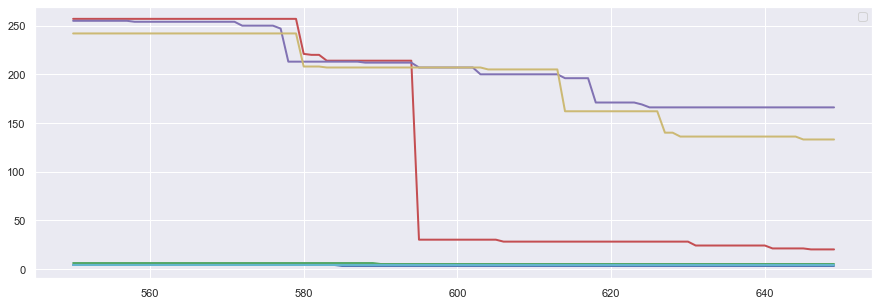

No handles with labels found to put in legend.


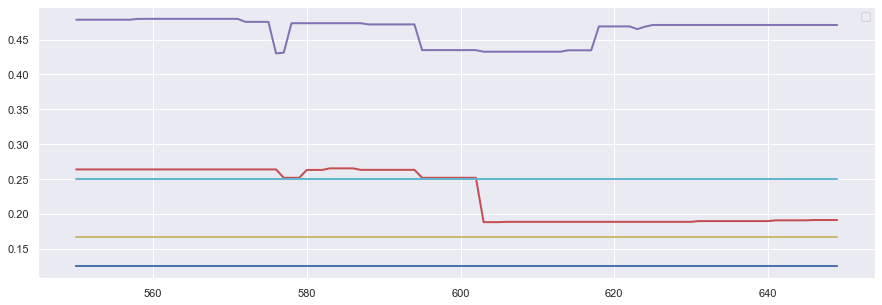

In [35]:
#linkage method average
linkage_mth='average'
Ya=list()
t1=time.time()
X=range(550,650)
for num_cl in X:
    X=Oploter(num_cl,linkage_mth)
    Ya.append(X)
t2=time.time()
print(round((t2-t1)/60) ,'min has time for calculaton distant')
Y_num=dict()
for i in range(0,6):
    Y_num.update({i:[x[i][1] for x in Ya]})
fig, ax = plt.subplots()
X=range(550,650)
for i in range(0,6):
    ax.plot(X,Y_num[i], linestyle='-', linewidth=2,c=color[i])
ax.legend();
plt.show() 
Y_Q=dict()
for i in range(0,6):
    Y_Q.update({i:[x[i][2] for x in Ya]})
fig, ax = plt.subplots()
X=range(550,650)
for i in range(0,6):
    ax.plot(X,Y_Q[i], linestyle='-', linewidth=2,c=color[i])
ax.legend();
plt.show() 

In [36]:
import winsound
def end ():
    for i in range (3):
        frequency = 2500  # Set Frequency To 2500 Hertz
        duration = 500  # Set Duration To 1000 ms == 1 second
        winsound.Beep(frequency, duration)
        frequency = 500  # Set Frequency To 2500 Hertz
        duration = 500  # Set Duration To 1000 ms == 1 second
        winsound.Beep(frequency, duration)
        frequency = 1000  # Set Frequency To 2500 Hertz
        duration = 500  # Set Duration To 1000 ms == 1 second
        winsound.Beep(frequency, duration)
    frequency = 1000  # Set Frequency To 2500 Hertz
    duration = 5000  # Set Duration To 1000 ms == 1 second
    winsound.Beep(frequency, duration)
end()